# Transversity-Pretzelosity Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
conf=load_config('inputs/transversity-pretzelosity.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 3027

## Data vs Theory

In [3]:
co=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys() if idx<8000])
pr=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys() if idx>=8000])

## Collins asymmetry 

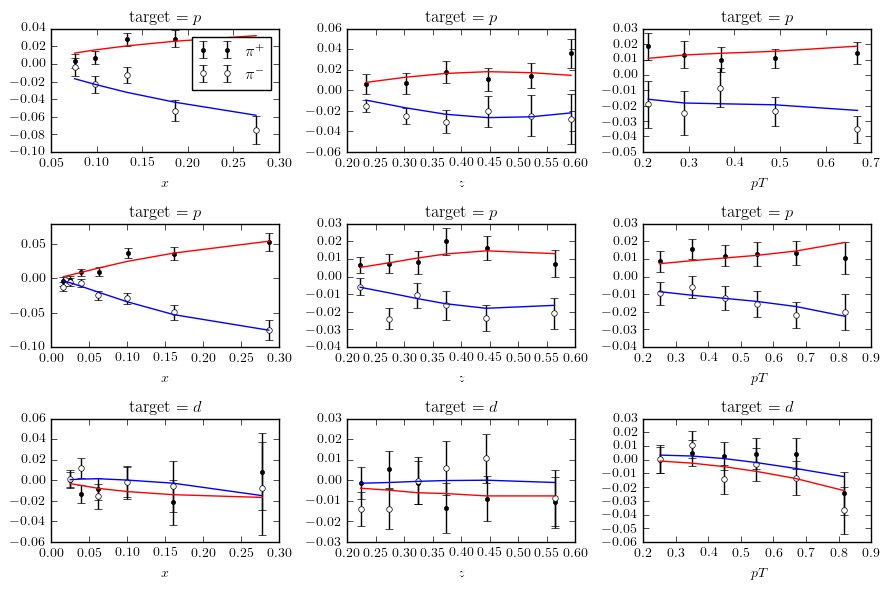

In [4]:
def plot(ax,axis,col,tar):
    if axis=='pT':
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
        if len(data_pip.value)==0:
            data_pip=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi+',col))
            data_pim=co.query('dependence=="pt" and target=="%s" and hadron=="%s" and col=="%s" '%(tar,'pi-',col))
    else:
        data_pip=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=co.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
    
    sign=1
    if col=='compass': sign=-1
    ax.errorbar(data_pip[axis],sign*data_pip['value'],yerr=data_pip['alpha'],fmt='k.',label=r'$\pi^+$')
    ax.errorbar(data_pim[axis],sign*data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',label=r'$\pi^-$',markersize=4)

    ax.plot(data_pip[axis].values,sign*data_pip['thy'].values,'r-')
    ax.plot(data_pim[axis].values,sign*data_pim['thy'].values,'b-')

    if tar=='proton': star='p'
    if tar=='deuteron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    #if axis=='x': ax.set_ylim(-0.05,0.05)

nrows,ncols=3,3
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for col in ['HERMES','compass']:
    if col=='HERMES': targets=['proton']
    if col=='compass': targets=['proton','deuteron']   
    for tar in targets:
        for axis  in ['x','z','pT']:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            plot(ax,axis,col,tar)
            if cnt==1: ax.legend()
py.tight_layout()

## Pretzelosity Asymmetry

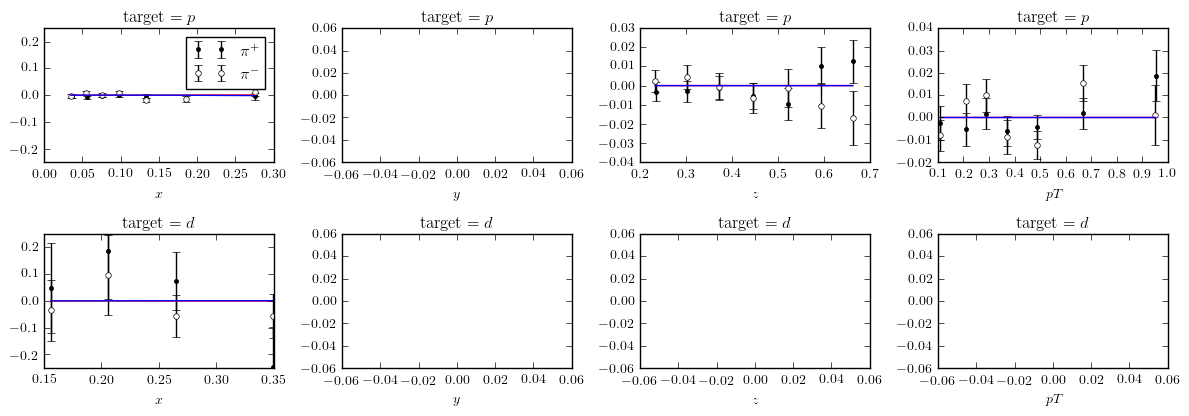

In [5]:
def plot(ax,axis,tar):
    data_pip=pr.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,'pi+'))
    data_pim=pr.query('axis=="%s" and target=="%s" and hadron=="%s" '%(axis,tar,'pi-'))
    if axis=='pt': axis='pT'
    ax.errorbar(data_pip[axis],data_pip['value'],yerr=data_pip['alpha'],fmt='k.',label=r'$\pi^+$')
    ax.errorbar(data_pim[axis],data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',label=r'$\pi^-$',markersize=4)

    ax.plot(data_pip[axis].values,data_pip['thy'].values,'r-')
    ax.plot(data_pim[axis].values,data_pim['thy'].values,'b-')

    if tar=='proton': star='p'
    if tar=='neutron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    if axis=='x': ax.set_ylim(-0.25,0.25)

nrows,ncols=4,4
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for tar in ['proton','neutron']:
    for axis  in ['x','y','z','pT']:
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        plot(ax,axis,tar)
        if cnt==1: ax.legend()
py.tight_layout()

## Transversity

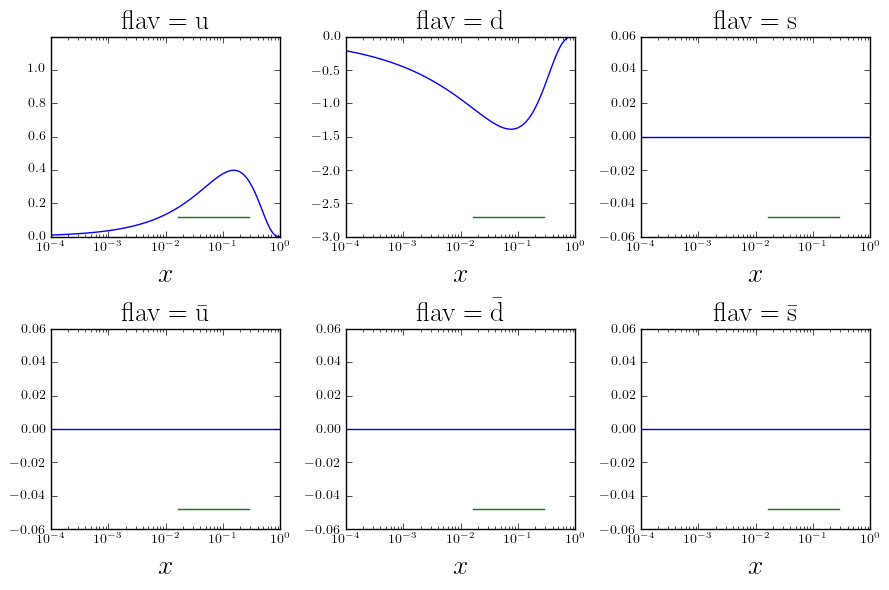

In [6]:
def plot(ax,iflav):
    X=10**np.linspace(-4,-1)
    X=np.append(X,np.linspace(0.1,1))
    Q2=1
    F=[conf['transversity'].get_C(x,Q2,target='p')[iflav] for x in X]
    ax.plot(X,F)

    ymin,ymax=ax.get_ylim()
    if   iflav==1: ax.set_ylim(0,1.2);ymin,ymax=ax.get_ylim()
    elif iflav==3: ax.set_ylim(-3.0,0);ymin,ymax=ax.get_ylim()
    xmin=np.amin(co.x.values)
    xmax=np.amax(co.x.values)
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    ax.semilogx()
    
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

## Pretzelosity

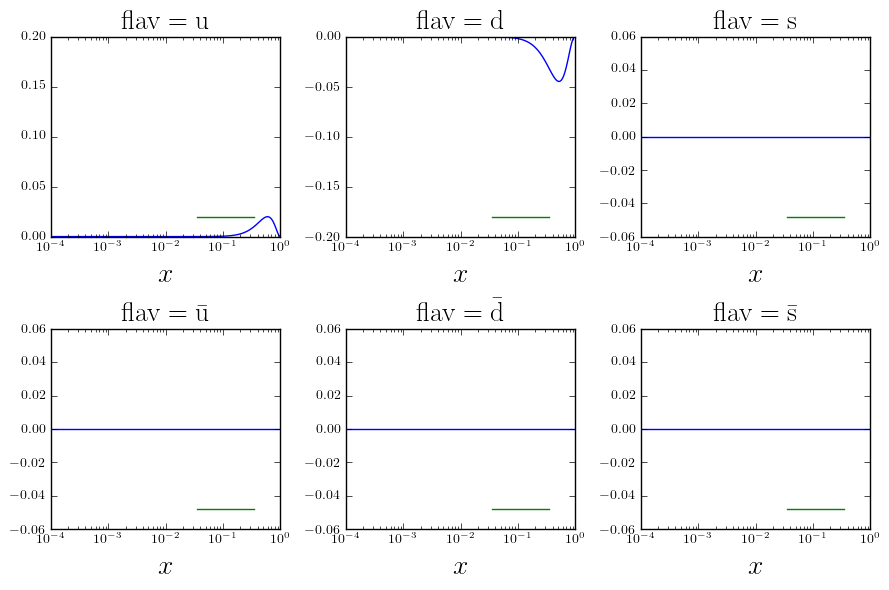

In [9]:
def plot(ax,iflav):
    X=10**np.linspace(-4,-1)
    X=np.append(X,np.linspace(0.1,1))
    
    Q2=1
    F=[conf['pretzelosity'].get_C(x,Q2,target='p')[iflav] for x in X]
    ax.plot(X,F)

    ymin,ymax=ax.get_ylim()
    if   iflav==1: ax.set_ylim(0,0.2);ymin,ymax=ax.get_ylim()
    elif iflav==3: ax.set_ylim(-0.2,0.0);ymin,ymax=ax.get_ylim()
    xmin=np.amin(pr.x.values)
    xmax=np.amax(pr.x.values)
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    ax.semilogx()
    
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)

    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()

## Collins

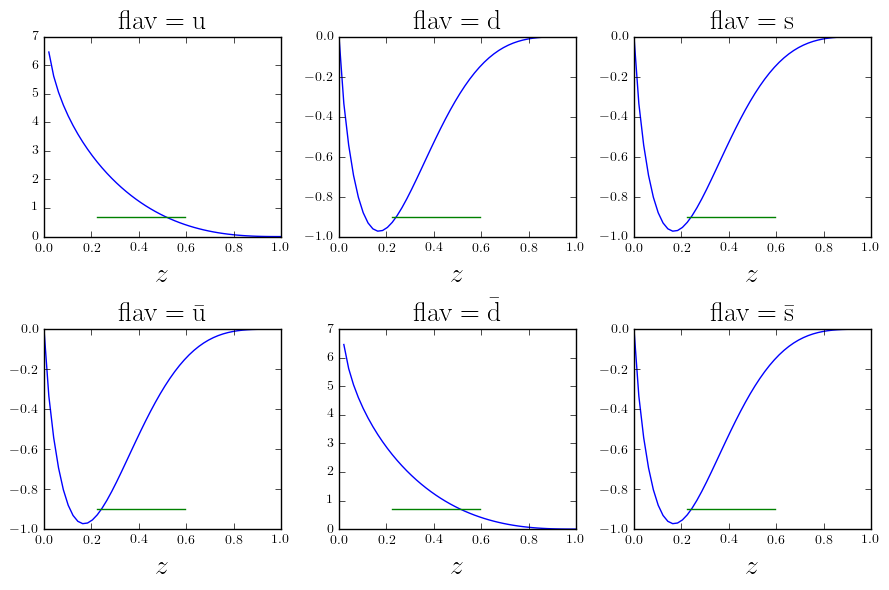

In [8]:
def plot(ax,iflav):
    Z=np.linspace(0.0,1)
    Q2=1
    ZF=[conf['collins'].get_C(z,Q2,hadron='pi+')[iflav] for z in Z]
    ax.plot(Z,ZF)
    
    ymin,ymax=ax.get_ylim()
    #if   iflav==1: ax.set_ylim(-10,0);ymin,ymax=ax.get_ylim()
    #elif iflav==3: ax.set_ylim(-10,0);ymin,ymax=ax.get_ylim()
    xmin=np.amin(co.z.values)
    xmax=np.amax(co.z.values)
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    #ax.semilogx()
    
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$z$',size=20)

    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()